In [1]:
import tensorflow as tf
import numpy as np

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
train_dir=r"D:\DL\DL\cifer-10-img\train"

In [4]:
test_dir=r"D:\DL\DL\cifer-10-img\test"

In [5]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255
)

test_datagen=ImageDataGenerator(
    rescale=1.0/255
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size= 5000,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=1000,
    class_mode='categorical'
)

Found 9921 images belonging to 10 classes.


In [8]:
x_train, y_train =train_generator[0]
x_test, y_test= test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


### a.Load in a pre-trained CNN model trained on a large dataset

In [9]:
from tensorflow.keras.applications import VGG16
weights_path= r"D:\DL\DL\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model= VGG16(weights=weights_path, include_top=False, input_shape=(32,32,3))

### b.Freeze parameters in model's lower convolutional layers 

In [10]:
for layer in base_model.layers:
    layer.trainable=False

### c. Add custom classifier with several layers of trainable parameters to model 

In [11]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [12]:
x=Flatten()(base_model.output)
x=Dense(256, activation='relu')(x)
x=Dropout(0.3)(x)

x=Dense(512, activation='relu')(x)
x=Dropout(0.3)(x)
predicted=Dense(10, activation='softmax')(x)

In [13]:
from tensorflow.keras.models import Model

In [14]:
model = Model(inputs=base_model.input, outputs=predicted)

In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
79/79 [==============================] - 27s 308ms/step - loss: 1.9148 - accuracy: 0.3112 - val_loss: 1.6008 - val_accuracy: 0.4240
Epoch 2/10
79/79 [==============================] - 23s 296ms/step - loss: 1.5444 - accuracy: 0.4518 - val_loss: 1.4453 - val_accuracy: 0.4910
Epoch 3/10
79/79 [==============================] - 23s 289ms/step - loss: 1.4121 - accuracy: 0.4980 - val_loss: 1.3562 - val_accuracy: 0.5200
Epoch 4/10
79/79 [==============================] - 24s 308ms/step - loss: 1.3356 - accuracy: 0.5332 - val_loss: 1.3384 - val_accuracy: 0.5480
Epoch 5/10
79/79 [==============================] - 23s 289ms/step - loss: 1.2596 - accuracy: 0.5458 - val_loss: 1.3016 - val_accuracy: 0.5460
Epoch 6/10
79/79 [==============================] - 24s 306ms/step - loss: 1.2048 - accuracy: 0.5798 - val_loss: 1.2924 - val_accuracy: 0.5560
Epoch 7/10
79/79 [==============================] - 23s 287ms/step - loss: 1.1482 - accuracy: 0.5874 - val_loss: 1.3355 - val_accuracy: 0.5360

In [17]:
base_model=VGG16(weights=weights_path, include_top=False, input_shape=(32,32,3))
for layer in base_model.layers:
    layer.trainable=False
    
for layer in base_model.layers[len(base_model.layers)-2:]:
    layer.trainable= True

In [18]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

In [19]:
model = Model(inputs = base_model.input, outputs = predictions)

In [20]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
79/79 [==============================] - 34s 388ms/step - loss: 1.8742 - accuracy: 0.3194 - val_loss: 1.5048 - val_accuracy: 0.4720
Epoch 2/10
79/79 [==============================] - 26s 327ms/step - loss: 1.4927 - accuracy: 0.4698 - val_loss: 1.3818 - val_accuracy: 0.5300
Epoch 3/10
79/79 [==============================] - 14s 182ms/step - loss: 1.3612 - accuracy: 0.5192 - val_loss: 1.3055 - val_accuracy: 0.5420
Epoch 4/10
79/79 [==============================] - 14s 180ms/step - loss: 1.2685 - accuracy: 0.5496 - val_loss: 1.2784 - val_accuracy: 0.5330
Epoch 5/10
79/79 [==============================] - 14s 182ms/step - loss: 1.2105 - accuracy: 0.5764 - val_loss: 1.2257 - val_accuracy: 0.5860
Epoch 6/10
79/79 [==============================] - 14s 181ms/step - loss: 1.1341 - accuracy: 0.6034 - val_loss: 1.2894 - val_accuracy: 0.5720
Epoch 7/10
79/79 [==============================] - 14s 180ms/step - loss: 1.0849 - accuracy: 0.6128 - val_loss: 1.2313 - val_accuracy: 0.5770

In [22]:
import matplotlib.pyplot as plt
predicted_value=model.predict(x_test)

32/32 [==============================] - 2s 57ms/step


In [23]:
labels = list(test_generator.class_indices.keys())

Predicted:  bird
Actual:  bird


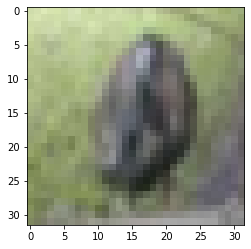

In [38]:
n=100
plt.imshow(x_test[n])
print("Predicted: ", labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])